<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-5-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: Bayes' rule

In [3]:
library(tidyverse)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Part 1: Simulating cancer testing 

In [4]:
set.seed(1)

In [5]:
rbernoulli(5, 0.5)

[1] FALSE FALSE  TRUE  TRUE FALSE

In [6]:
rbernoulli(5, 0.5)

[1]  TRUE  TRUE  TRUE  TRUE FALSE

In [7]:
rbernoulli(5, c(0.75, 0.1, 0.1, .75, 0.1))

[1] FALSE FALSE FALSE  TRUE FALSE

In [8]:
rbernoulli(5, c(0.75, 0.1, 0.1, .75, 0.1))

[1]  TRUE FALSE  TRUE  TRUE FALSE

In [9]:
set.seed(22)

In [10]:
num_patients <- 1e6
incidence <- 0.009
tpr <- 0.75
tnr <- 0.9

In [11]:
cancer <- rbernoulli(num_patients, incidence)
head(cancer)

[1] FALSE FALSE  TRUE FALSE FALSE FALSE

In [12]:
p_pos <- if_else(cancer, tpr, 1-tnr)
head(p_pos)

[1] 0.10 0.10 0.75 0.10 0.10 0.10

In [13]:
set.seed(22)

In [14]:
patients <- tibble(
    cancer = rbernoulli(num_patients, incidence),
    test = rbernoulli(num_patients, if_else(cancer, tpr, 1-tnr))
)

In [15]:
head(patients)

cancer,test
<lgl>,<lgl>
FALSE,FALSE
FALSE,TRUE
TRUE,TRUE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


In [16]:
patients %>%
    filter(test == TRUE) %>%
    summarize(p = mean(cancer))

p
<dbl>
0.06453958


# 2. Probabilities vs Counts

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 301 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 295 rows containing non-finite values (stat_bin).”


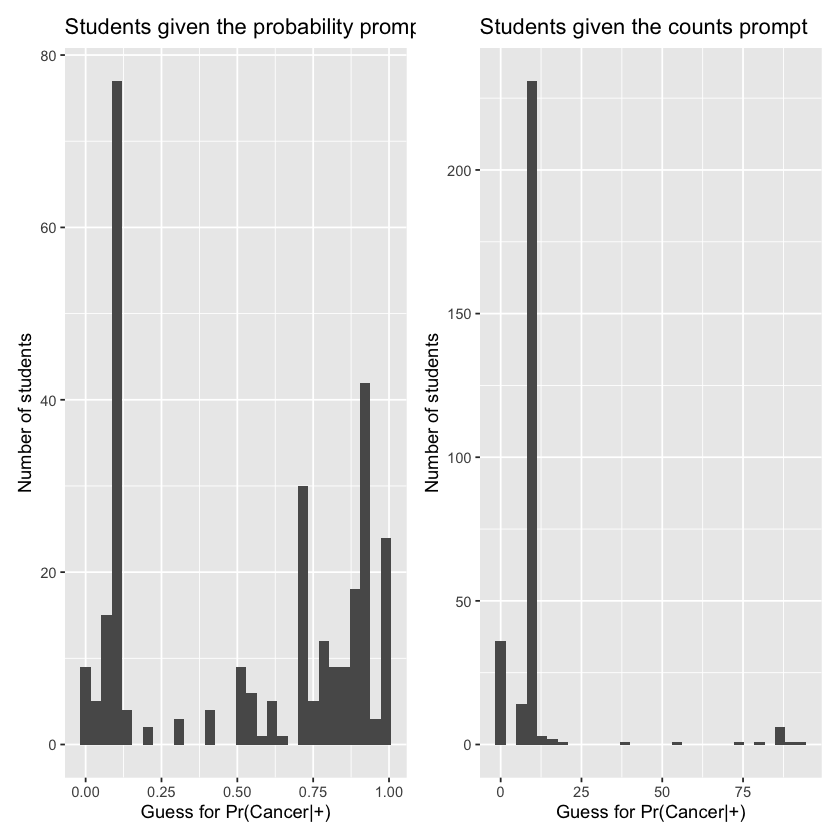

In [17]:
api201_mammograms <- read.csv(url("https://github.com/5harad/API201-students/blob/main/data/mammograms.csv?raw=true"))

probs <- ggplot(api201_mammograms, aes(x=probability_prompt)) + 
                geom_histogram() + 
                scale_x_continuous("Guess for Pr(Cancer|+)") + 
                scale_y_continuous("Number of students") + 
                labs(title = "Students given the probability prompt")

counts <- ggplot(api201_mammograms, aes(x=count_prompt)) + 
                geom_histogram() + 
                scale_x_continuous("Guess for Pr(Cancer|+)") + 
                scale_y_continuous("Number of students") + 
                labs(title = "Students given the counts prompt")

patchwork <- probs + counts 
patchwork
